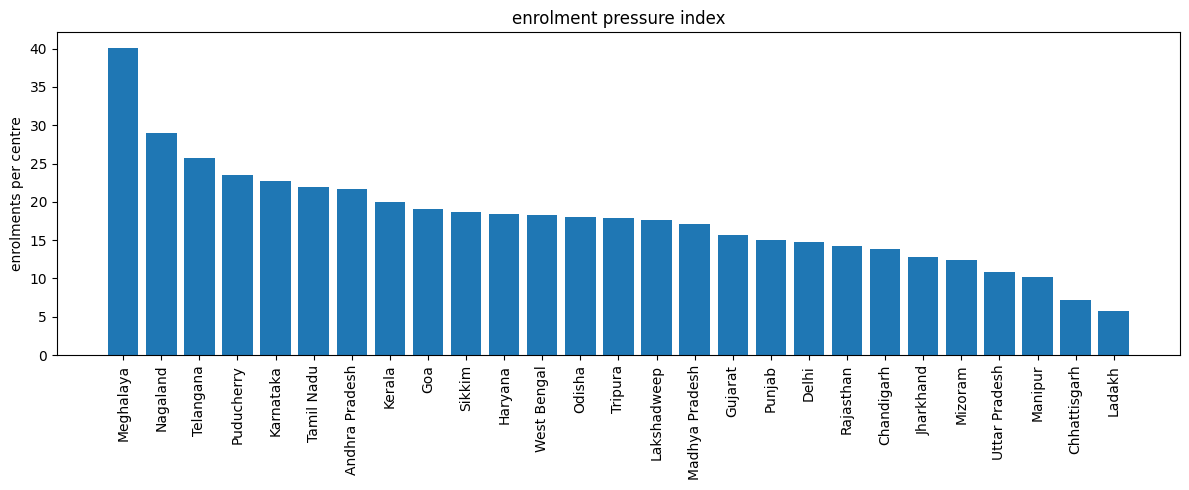

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrolments=enrolment_df.groupby("state").size().reset_index(name="enrolments")

centres=pd.read_csv("../sql/data/Aadhar.csv")
centres=centres.rename(columns={"State":"state","No. of centres":"centres"})
centres["centres"]=pd.to_numeric(centres["centres"],errors="coerce")

df=enrolments.merge(centres,on="state",how="inner")
df["enrolment_pressure_index"]=df["enrolments"]/df["centres"]
df=df.sort_values("enrolment_pressure_index",ascending=False)

plt.figure(figsize=(12,5))
plt.bar(df["state"],df["enrolment_pressure_index"])
plt.xticks(rotation=90)
plt.ylabel("enrolments per centre")
plt.title("enrolment pressure index")
plt.tight_layout()
plt.show()
